In [1]:
#EDA helps us understand the structure, trends, and patterns in the data before performing deeper analysis. 
#Below is the step-by-step approach for r/travel

#I took unique posts from r/travel reddit and saved in csv file now performing EDA using csv file


In [8]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [9]:
#saving csv data to dataframe
travelhacks_df = pd.read_csv('./travelhacks_subreddit_cleaned_posts.csv')



In [10]:
#sample data analysis
travelhacks_df['subreddit'].unique()


array(['TravelHacks'], dtype=object)

In [11]:
travelhacks_df.shape

(1007, 8)

In [12]:
#no null data for 1002 records
travelhacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1007 non-null   object 
 1   created_utc   1007 non-null   float64
 2   title         1007 non-null   object 
 3   author        973 non-null    object 
 4   selftext      938 non-null    object 
 5   num_comments  1007 non-null   int64  
 6   score         1007 non-null   int64  
 7   subreddit     1007 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 63.1+ KB


In [13]:
travelhacks_df.isnull().sum()

id               0
created_utc      0
title            0
author          34
selftext        69
num_comments     0
score            0
subreddit        0
dtype: int64

In [14]:
travelhacks_df['combined_text'] = travelhacks_df['title'] + ' ' + travelhacks_df['selftext'].fillna('')

# display sample data
travelhacks_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text
0,1hlrl7m,1.735092e+09,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ..."
1,1hsik2h,1.735896e+09,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...
2,1hiwnmh,1.734737e+09,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...
3,1j48rfq,1.741196e+09,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...
4,1hia8nr,1.734663e+09,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...


In [15]:
travelhacks_df.isnull().sum()

id                0
created_utc       0
title             0
author           34
selftext         69
num_comments      0
score             0
subreddit         0
combined_text     0
dtype: int64

In [16]:
travelhacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1007 non-null   object 
 1   created_utc    1007 non-null   float64
 2   title          1007 non-null   object 
 3   author         973 non-null    object 
 4   selftext       938 non-null    object 
 5   num_comments   1007 non-null   int64  
 6   score          1007 non-null   int64  
 7   subreddit      1007 non-null   object 
 8   combined_text  1007 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 70.9+ KB


In [17]:
removed_posts_travelhacks = travelhacks_df[travelhacks_df['author'] == '[removed]']
removed_posts_travelhacks


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text


In [18]:
deleted_posts_travelhacks = travelhacks_df[travelhacks_df['author'] == '[deleted]']
deleted_posts_travelhacks

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text


In [19]:
#created_utc to readable format conversion
travelhacks_df['created_utc'] = pd.to_datetime(travelhacks_df['created_utc'], unit='s')

travelhacks_df[['created_utc']].head()

travelhacks_df['year'] = travelhacks_df['created_utc'].dt.year
travelhacks_df['month'] = travelhacks_df['created_utc'].dt.month
travelhacks_df['day'] = travelhacks_df['created_utc'].dt.day
travelhacks_df['hour'] = travelhacks_df['created_utc'].dt.hour
travelhacks_df['day_of_week'] = travelhacks_df['created_utc'].dt.day_name()

travelhacks_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,12,25,2,Wednesday
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,1,3,9,Friday
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,12,20,23,Friday
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,3,5,17,Wednesday
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,12,20,2,Friday


In [20]:
travelhacks_df.duplicated().sum()

0

In [21]:
travelhacks_df.isnull().sum()

id                0
created_utc       0
title             0
author           34
selftext         69
num_comments      0
score             0
subreddit         0
combined_text     0
year              0
month             0
day               0
hour              0
day_of_week       0
dtype: int64

In [22]:
travelhacks_df.describe()
travelhacks_df['subreddit'].unique()

array(['TravelHacks'], dtype=object)

In [23]:
# active authors
travelhacks_df['author'].value_counts().head(10)

author
Initial_Aide_6603       6
John_Martson_isalive    4
Delicious_Mess7976      4
Aggravating-Bike-397    4
iou88336                4
Pale_Field4584          3
GroundbreakingCap368    3
DAWG13610               3
NewWishbone3698         3
shockedpikachu123       3
Name: count, dtype: int64

In [24]:
# Check for duplicate titles
travelhacks_df['title'].value_counts().head(10)

title
Extremely Sensitive Stomach                                               2
Going to Asia                                                             2
Everyone stop what you are doing and check the dates on your passport.    2
TripAdvisor honored $14,000 mistake.                                      1
Under seat bag                                                            1
Are there any good FREE airline point transfer points websites?           1
Accommodation in LA                                                       1
How does insurance work for 21 yr old driver                              1
Short Layover in MIA                                                      1
Suit on a Jetstar domestic flight with carry-on?                          1
Name: count, dtype: int64

In [25]:
# Checks for outliers in upvotes and comments using statistical measure percentile
travelhacks_df[['score', 'num_comments']].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

,score,num_comments
0.25,1.00,9.00
0.50,65.00,31.00
0.75,181.00,132.00
0.95,538.00,478.40
0.99,1479.06,892.76


In [26]:
#calculating the length of the self text to understand the story behind the self text
travelhacks_df['text_length'] = travelhacks_df['combined_text'].apply(lambda x: len(x.split()))

In [27]:
travelhacks_df.shape

(1007, 15)

In [28]:
# Correlation analysis for numerical features
travelhacks_df[['score', 'num_comments', 'text_length']].corr()

,score,num_comments,text_length
score,1.000000,0.303151,0.076571
num_comments,0.303151,1.000000,-0.053610
text_length,0.076571,-0.053610,1.000000


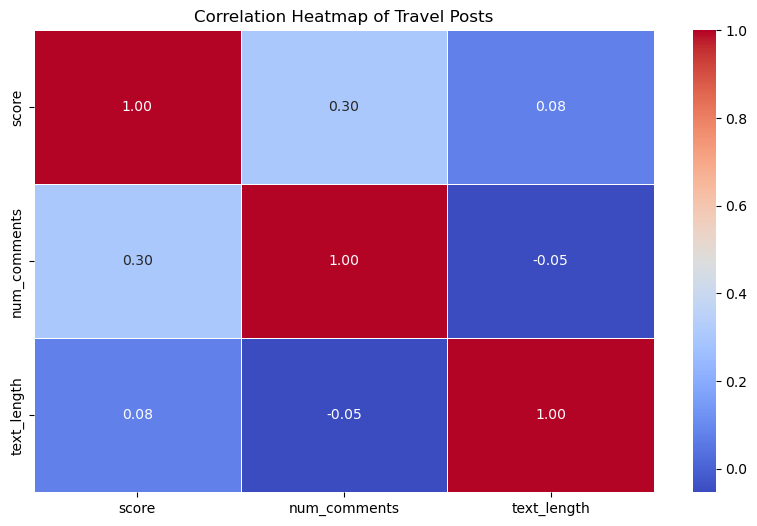

In [29]:
# Compute the correlation matrix using heat map
corr_matrix = travelhacks_df[['score', 'num_comments', 'text_length']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Travel Posts")
plt.show()


In [30]:
#score and num_comments are positively correlated
#text length and score are negatively correlated

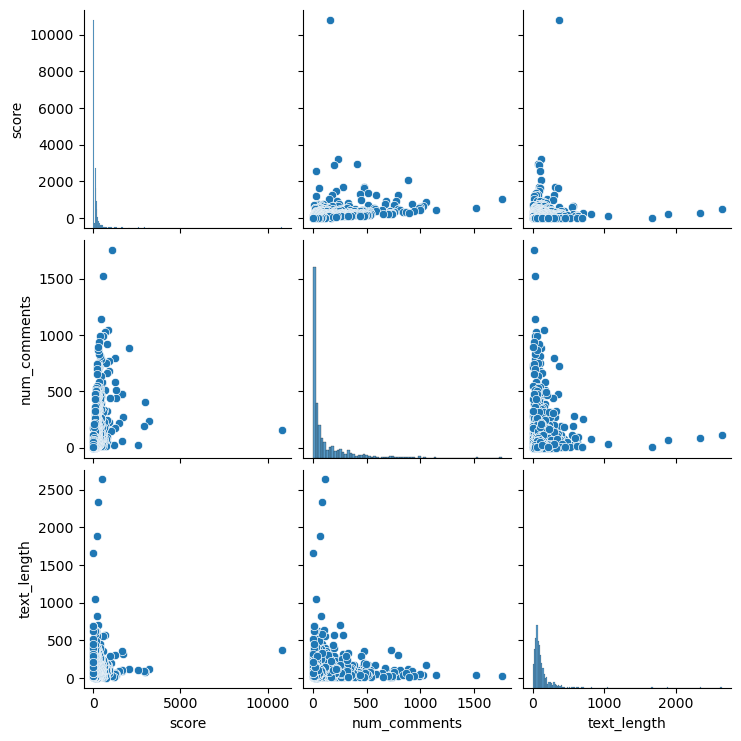

In [31]:
sns.pairplot(travelhacks_df[['score', 'num_comments', 'text_length']])
plt.show()

In [32]:
travelhacks_df[['text_length', 'score', 'num_comments']].describe()

,text_length,score,num_comments
count,1007.000000,1007.000000,1007.000000
mean,120.685204,156.552135,113.094340
std,166.778621,439.882113,188.438351
min,3.000000,0.000000,0.000000
25%,51.000000,1.000000,9.000000
50%,85.000000,65.000000,31.000000
75%,136.000000,181.000000,132.000000
max,2638.000000,10816.000000,1759.000000


In [33]:
#summary statistics of object features
travelhacks_df.describe(include='object')

,id,title,author,selftext,subreddit,combined_text,day_of_week
count,1007,1007,973,938,1007,1007,1007
unique,1007,1004,913,935,1,1004,7
top,1hlrl7m,Extremely Sensitive Stomach,Initial_Aide_6603,I am travelling soon but i have a very sensiti...,TravelHacks,Extremely Sensitive Stomach I am travelling so...,Thursday
freq,1,2,6,2,1007,2,163


In [34]:
# Display top 5 longest posts
travelhacks_df[['title', 'text_length', 'score']].sort_values(by='text_length', ascending=False).head()

,title,text_length,score
56,My Giga List of Top Travel Hacks,2638,495
119,FRONTIER AIRLINES - My list of 10 rules to avo...,2336,289
181,Sharing Some Tips/Thoughts Based on My Recent ...,1891,222
811,My Life as a (Newly Minted) Road Warrior - A S...,1665,2
414,Hack- always take photos Visa lost - ...,1046,129


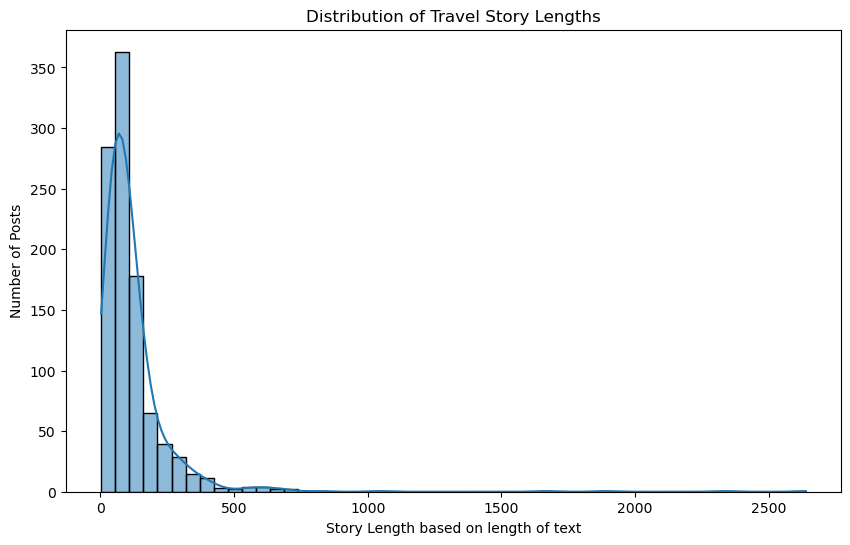

In [35]:
#length of self text and number of posts
plt.figure(figsize=(10,6))
sns.histplot(travelhacks_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Travel Story Lengths')
plt.xlabel('Story Length based on length of text')
plt.ylabel('Number of Posts')
plt.show()

In [36]:
travelhacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1007 non-null   object        
 1   created_utc    1007 non-null   datetime64[ns]
 2   title          1007 non-null   object        
 3   author         973 non-null    object        
 4   selftext       938 non-null    object        
 5   num_comments   1007 non-null   int64         
 6   score          1007 non-null   int64         
 7   subreddit      1007 non-null   object        
 8   combined_text  1007 non-null   object        
 9   year           1007 non-null   int32         
 10  month          1007 non-null   int32         
 11  day            1007 non-null   int32         
 12  hour           1007 non-null   int32         
 13  day_of_week    1007 non-null   object        
 14  text_length    1007 non-null   int64         
dtypes: datetime64[ns](1),

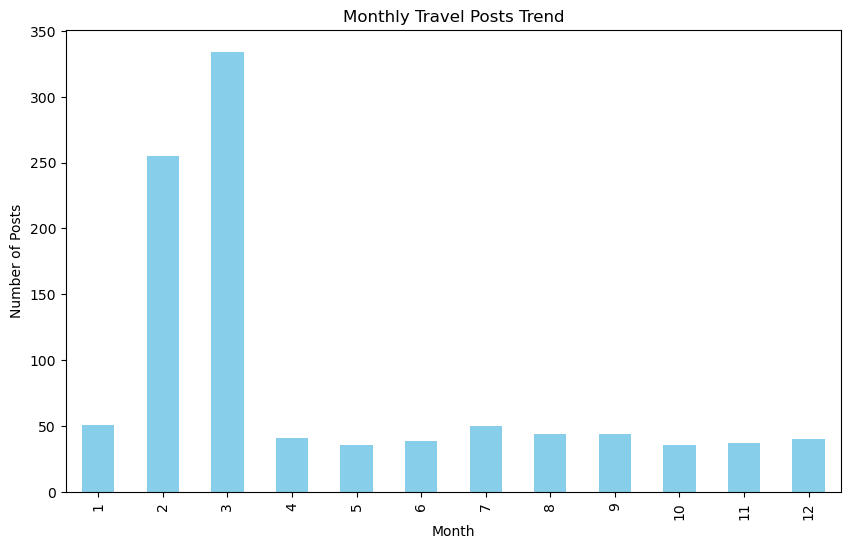

In [37]:
# Group posts by month and count
monthly_trend = travelhacks_df.groupby('month').size()

# Plot the trend
plt.figure(figsize=(10,6))
monthly_trend.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Monthly Travel Posts Trend')
plt.show()



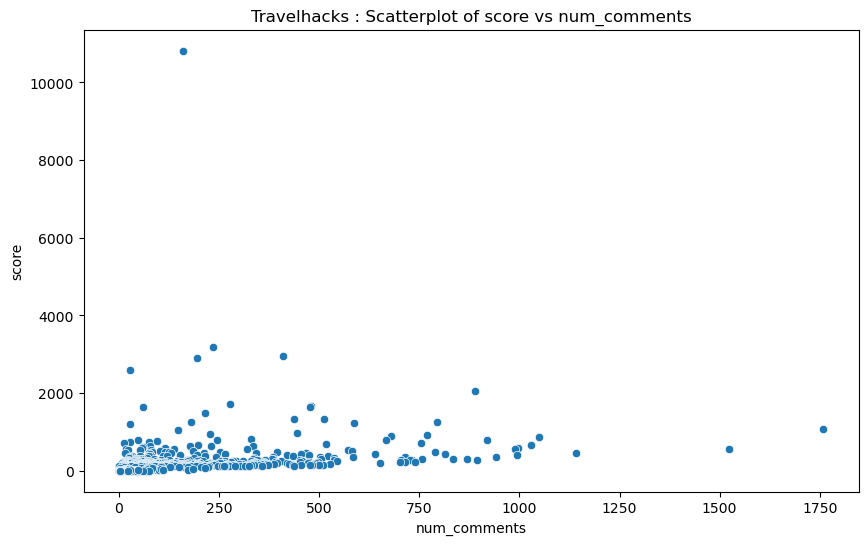

In [38]:
#EDA for score vs num_comments
plt.figure(figsize=(10,6))
sns.scatterplot(data=travelhacks_df, x='num_comments', y='score')
plt.title('Travelhacks : Scatterplot of score vs num_comments');

In [39]:
#display top 10 authors from travelhacks reddit dataframe
def top_20_authors(travelhacks_df, value):
    top_authors = []
    for i in range(value):
        top_authors.append(travelhacks_df.author.value_counts().index[i])
    return top_authors


In [40]:
top_travelhacks_authors = top_20_authors(travelhacks_df, 20)
top_travelhacks_authors

['Initial_Aide_6603',
 'John_Martson_isalive',
 'Delicious_Mess7976',
 'Aggravating-Bike-397',
 'iou88336',
 'Pale_Field4584',
 'GroundbreakingCap368',
 'DAWG13610',
 'NewWishbone3698',
 'shockedpikachu123',
 'big_zk',
 'PopNo5397',
 'Expensive_One_4602',
 'VenetoSuperTuscan',
 'ccx941',
 'Addicted_2_tacos',
 'Technical_Medicine68',
 'PhebeSandifer',
 'HaleyandZach',
 'Old_Raspberry_2649']

In [41]:
top_authors_travelhacks_df = travelhacks_df[travelhacks_df.author.isin(top_20_authors(travelhacks_df,20))]
top_authors_travelhacks_df.sort_values(by = 'score', ascending = False)[['author', 'num_comments', 'score', 'selftext']]

,author,num_comments,score,selftext
21,iou88336,769,916,"Fellow travellers, as the title says. What hid..."
39,John_Martson_isalive,336,636,Do people even know these cities exist:\n\n[ta...
46,ccx941,137,571,Go into whatever you use for a reminder be it ...
49,Pale_Field4584,1523,549,A country you think is too expensive for what ...
67,shockedpikachu123,75,457,Here’s a travel hack tip to try on your next t...
76,Pale_Field4584,994,412,I'm looking at countries I should void when it...
85,Addicted_2_tacos,73,382,We just made a roadtrip around the US (Startin...
109,DAWG13610,43,305,As those of you who travel internationally kno...
132,shockedpikachu123,104,266,"While it may be obvious to some, may be it won..."
137,Aggravating-Bike-397,31,262,It helps to refresh and reset yourself. If you...


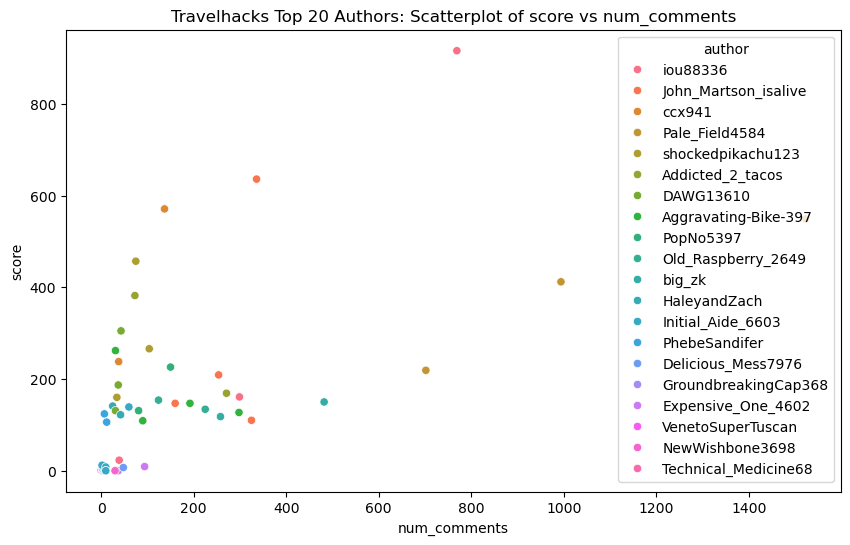

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_authors_travelhacks_df, x='num_comments', y='score',hue='author')
plt.title('Travelhacks Top 20 Authors: Scatterplot of score vs num_comments');

In [43]:
travelhacks_df['subreddit'].unique()

array(['TravelHacks'], dtype=object)

In [44]:

travelhacks_df['combined_word_count'] = travelhacks_df['combined_text'].map(lambda x: len(x.split()))

In [45]:
travelhacks_df[['combined_word_count']].describe()


,combined_word_count
count,1007.000000
mean,120.685204
std,166.778621
min,3.000000
25%,51.000000
50%,85.000000
75%,136.000000
max,2638.000000


In [46]:
travelhacks_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length,combined_word_count
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,12,25,2,Wednesday,365,365
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,1,3,9,Friday,119,119
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,12,20,23,Friday,83,83
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,3,5,17,Wednesday,96,96
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,12,20,2,Friday,105,105


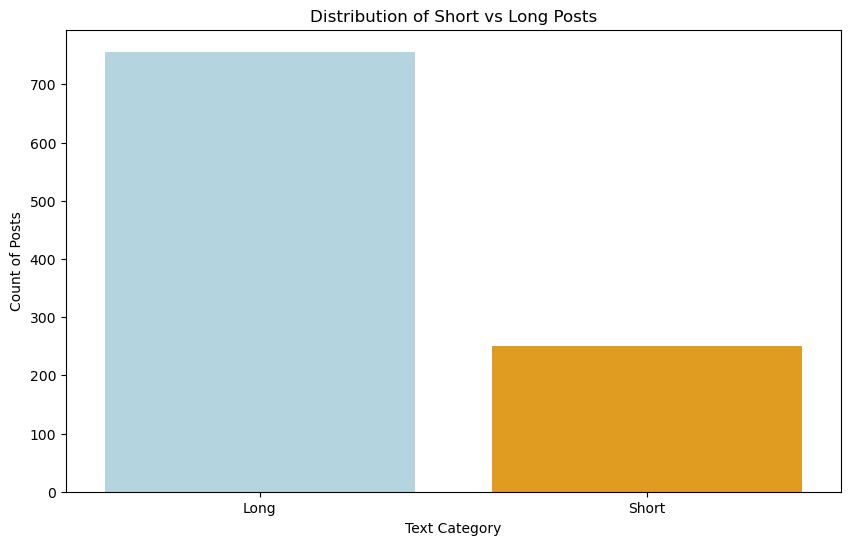

In [47]:
#short vs long posts
#featured text_category for analyzing engagement
#The text_category column is created for "Short" or "Long" based on combined_word_count.
travelhacks_df['text_category'] = travelhacks_df['combined_word_count'].apply(lambda x: 'Short' if x <= 50 else 'Long')
text_count = travelhacks_df['text_category'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=text_count.index, y=text_count.values, palette=['lightblue', 'orange'])
plt.xlabel('Text Category')
plt.ylabel('Count of Posts')
plt.title('Distribution of Short vs Long Posts')
plt.show()



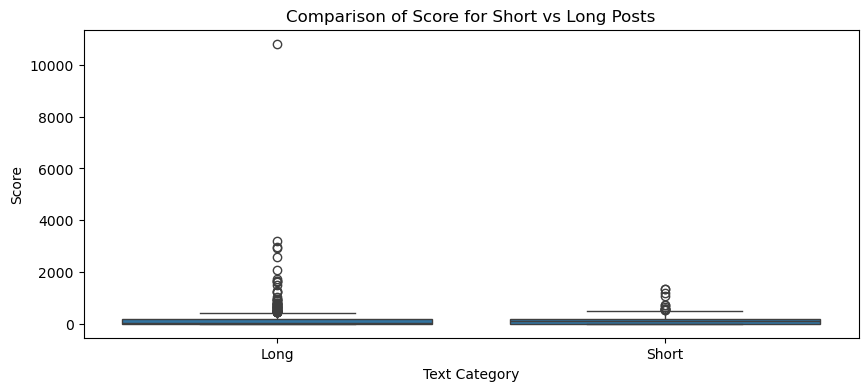

In [48]:

plt.figure(figsize=(10,4))
sns.boxplot(x='text_category', y='score', data=travelhacks_df)
plt.xlabel('Text Category')
plt.ylabel('Score')
plt.title('Comparison of Score for Short vs Long Posts')
plt.show()


In [49]:
travelhacks_df.columns

Index(['id', 'created_utc', 'title', 'author', 'selftext', 'num_comments',
       'score', 'subreddit', 'combined_text', 'year', 'month', 'day', 'hour',
       'day_of_week', 'text_length', 'combined_word_count', 'text_category'],
      dtype='object')

In [50]:
travelhacks_df[['combined_word_count', 'score', 'num_comments']].corr()



,combined_word_count,score,num_comments
combined_word_count,1.000000,0.076571,-0.053610
score,0.076571,1.000000,0.303151
num_comments,-0.053610,0.303151,1.000000


In [51]:
travelhacks_df.groupby('text_category')[['score', 'num_comments']].mean()

,score,num_comments
text_category,,
Long,162.305556,97.911376
Short,139.223108,158.824701


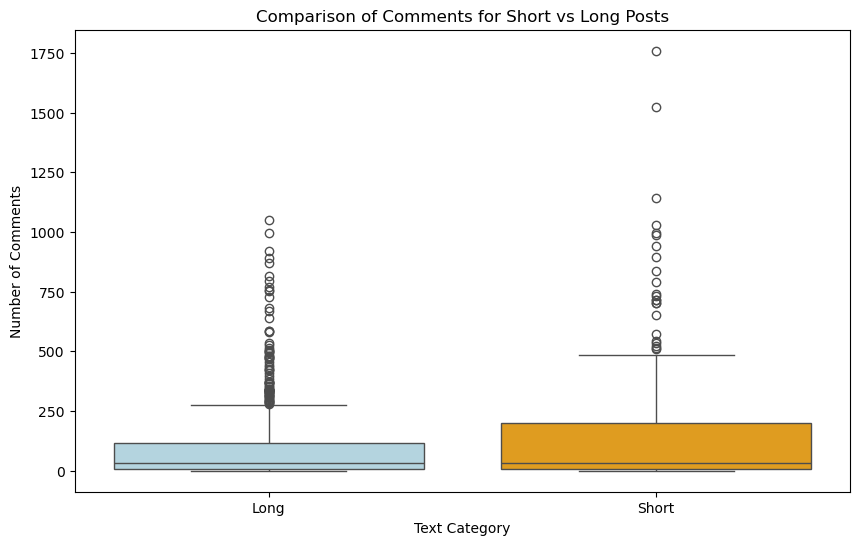

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='text_category', y='num_comments', data=travelhacks_df, palette=['lightblue', 'orange'])
plt.xlabel('Text Category')
plt.ylabel('Number of Comments')
plt.title('Comparison of Comments for Short vs Long Posts')
plt.show()

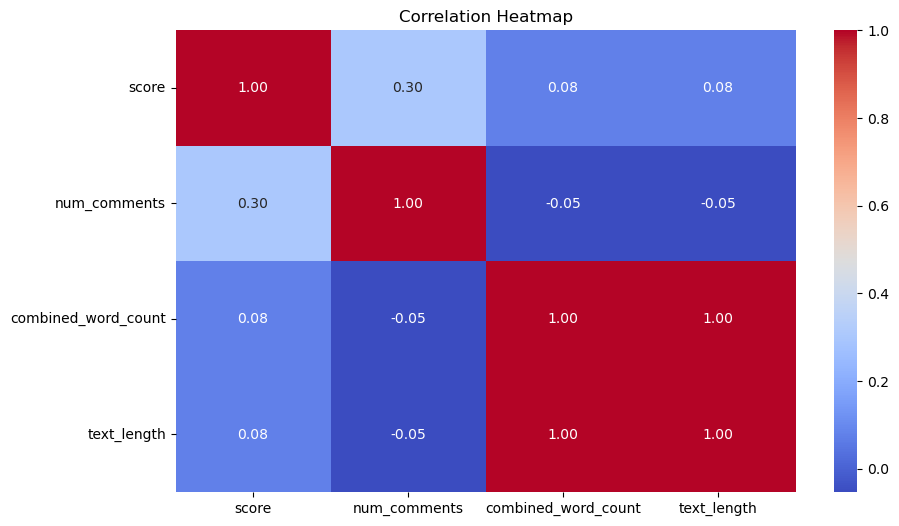

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(travelhacks_df[['score', 'num_comments', 'combined_word_count', 'text_length']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

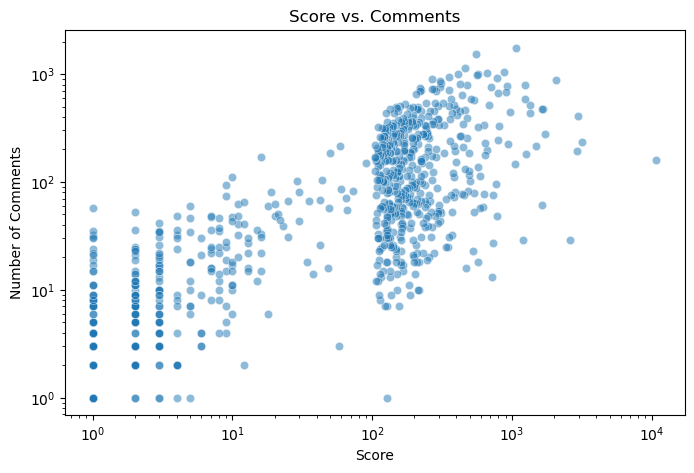

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=travelhacks_df, x='score', y='num_comments', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.title('Score vs. Comments')
plt.xscale('log')
plt.yscale('log')
plt.show()

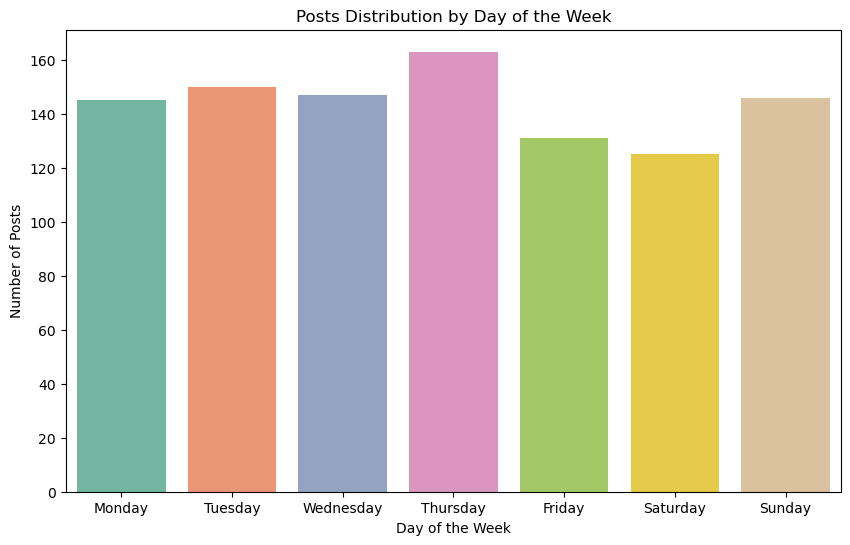

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(data=travelhacks_df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.title('Posts Distribution by Day of the Week')
plt.show()

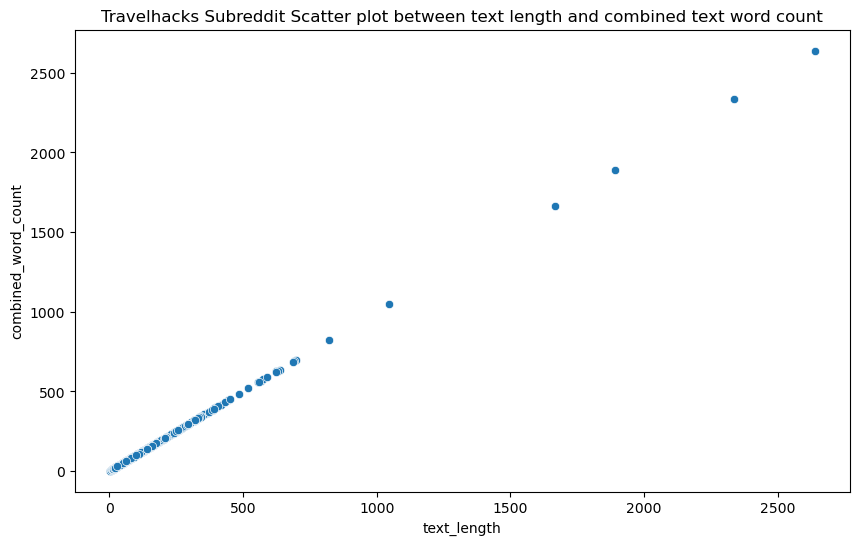

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=travelhacks_df, x='text_length', y='combined_word_count')
plt.title('Travelhacks Subreddit Scatter plot between text length and combined text word count');

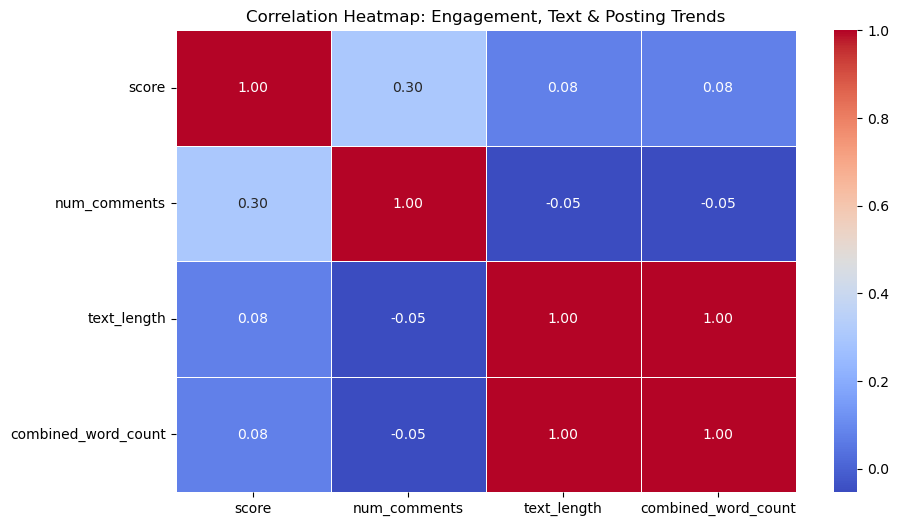

In [57]:
corr_features = ['score', 'num_comments', 'text_length', 'combined_word_count']
corr_matrix = travelhacks_df[corr_features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Engagement, Text & Posting Trends')
plt.show()


In [58]:
travelhacks_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length,combined_word_count,text_category
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,12,25,2,Wednesday,365,365,Long
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,1,3,9,Friday,119,119,Long
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,12,20,23,Friday,83,83,Long
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,3,5,17,Wednesday,96,96,Long
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,12,20,2,Friday,105,105,Long


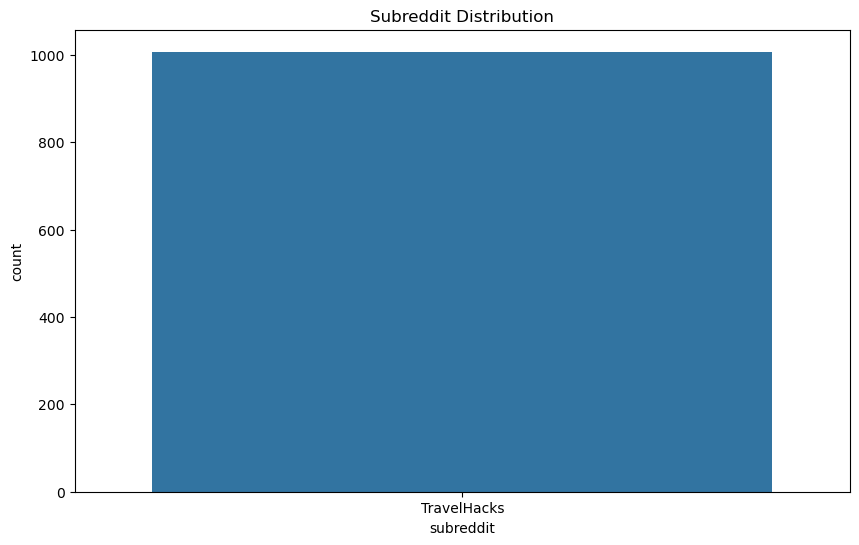

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=travelhacks_df)
plt.title('Subreddit Distribution')
plt.show()

In [60]:
travelhacks_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length,combined_word_count,text_category
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,12,25,2,Wednesday,365,365,Long
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,1,3,9,Friday,119,119,Long
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,12,20,23,Friday,83,83,Long
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,3,5,17,Wednesday,96,96,Long
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,12,20,2,Friday,105,105,Long


In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# stop words
stop_words = set(stopwords.words('english'))
#function for stop words
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())  
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words] 
    return ' '.join(filtered_tokens)  
travelhacks_df['cleaned_text'] = travelhacks_df['combined_text'].fillna('').apply(remove_stopwords)
travelhacks_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,12,25,2,Wednesday,365,365,Long,tripadvisor honored mistake much hack error ma...
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,1,3,9,Friday,119,119,Long,please check bag flight baggage officer strong...
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,12,20,23,Friday,83,83,Long,never fly ear infection 16 hour flight semi ma...
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,3,5,17,Wednesday,96,96,Long,best airport hack wish knew sooner flight gets...
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,12,20,2,Friday,105,105,Long,learned great fact booking united selecting fl...


In [62]:
#Preprocessing steps
#define stopwords and lemmatizer
#clean the text->converted text to lower case and removed punctuation, special characters and numbers
#tokenization->splits cleaned text to individual words->Used tokenization for sentimental analysis
#remove stopwords->filters out words unwanted words(the,is,and)
#Lemmatization->converts words jumping,jumps,jumped->jump
#bigrams->words into list of bigram phrases
#trigrams->words into list of trigram phrases->used bigrams for NLP and text analysis
#created new columns to store the cleaned_text,tokentized_text,bigrams and trigrams

In [63]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return "" 
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    return text.strip()

def preprocess_text(text):
    text = clean_text(text) 
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return tokens

def generate_ngrams(tokens, n):
    return [" ".join(gram) for gram in ngrams(tokens, n)]

travelhacks_df['cleaned_text'] = travelhacks_df['combined_text'].apply(clean_text) 
travelhacks_df['tokenized_text'] = travelhacks_df['cleaned_text'].apply(preprocess_text)  
travelhacks_df['bigrams'] = travelhacks_df['tokenized_text'].apply(lambda x: generate_ngrams(x, 2))  
travelhacks_df['trigrams'] = travelhacks_df['tokenized_text'].apply(lambda x: generate_ngrams(x, 3))  
travelhacks_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,...,25,2,Wednesday,365,365,Long,tripadvisor honored mistake \nnot so much a h...,"[tripadvisor, honored, mistake, much, hack, er...","[tripadvisor honored, honored mistake, mistake...","[tripadvisor honored mistake, honored mistake ..."
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,...,3,9,Friday,119,119,Long,please do this if you check in your bag on a f...,"[please, check, bag, flight, baggage, officer,...","[please check, check bag, bag flight, flight b...","[please check bag, check bag flight, bag fligh..."
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,...,20,23,Friday,83,83,Long,never fly with an ear infection i once had a ...,"[never, fly, ear, infection, hour, flight, sem...","[never fly, fly ear, ear infection, infection ...","[never fly ear, fly ear infection, ear infecti..."
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,...,5,17,Wednesday,96,96,Long,the best airport hack i wish i knew sooner if ...,"[best, airport, hack, wish, knew, sooner, flig...","[best airport, airport hack, hack wish, wish k...","[best airport hack, airport hack wish, hack wi..."
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,...,20,2,Friday,105,105,Long,i learned a great fact about booking through u...,"[learned, great, fact, booking, united, airlin...","[learned great, great fact, fact booking, book...","[learned great fact, great fact booking, fact ..."


In [64]:
travelhacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1007 non-null   object        
 1   created_utc          1007 non-null   datetime64[ns]
 2   title                1007 non-null   object        
 3   author               973 non-null    object        
 4   selftext             938 non-null    object        
 5   num_comments         1007 non-null   int64         
 6   score                1007 non-null   int64         
 7   subreddit            1007 non-null   object        
 8   combined_text        1007 non-null   object        
 9   year                 1007 non-null   int32         
 10  month                1007 non-null   int32         
 11  day                  1007 non-null   int32         
 12  hour                 1007 non-null   int32         
 13  day_of_week          1007 non-nul

In [65]:
travelhacks_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams
0,1hlrl7m,2024-12-25 02:03:51,"TripAdvisor honored $14,000 mistake.",iam10eight,\nNot so much a “hack” as it was an error made...,159,10816,TravelHacks,"TripAdvisor honored $14,000 mistake. \nNot so ...",2024,...,25,2,Wednesday,365,365,Long,tripadvisor honored mistake \nnot so much a h...,"[tripadvisor, honored, mistake, much, hack, er...","[tripadvisor honored, honored mistake, mistake...","[tripadvisor honored mistake, honored mistake ..."
1,1hsik2h,2025-01-03 09:18:15,Please do this if you check in your bag on a f...,McVeggy,"As a baggage officer, I strongly recommend att...",234,3194,TravelHacks,Please do this if you check in your bag on a f...,2025,...,3,9,Friday,119,119,Long,please do this if you check in your bag on a f...,"[please, check, bag, flight, baggage, officer,...","[please check, check bag, bag flight, flight b...","[please check bag, check bag flight, bag fligh..."
2,1hiwnmh,2024-12-20 23:23:56,Never Fly with an ear infection!,Small-Bus-1881,I once had a 16 hour flight with a semi major ...,410,2961,TravelHacks,Never Fly with an ear infection! I once had a ...,2024,...,20,23,Friday,83,83,Long,never fly with an ear infection i once had a ...,"[never, fly, ear, infection, hour, flight, sem...","[never fly, fly ear, ear infection, infection ...","[never fly ear, fly ear infection, ear infecti..."
3,1j48rfq,2025-03-05 17:38:03,The best airport hack I wish I knew sooner,mrgrassydassy,"If your flight gets delayed or canceled, don’t...",195,2913,TravelHacks,The best airport hack I wish I knew sooner If ...,2025,...,5,17,Wednesday,96,96,Long,the best airport hack i wish i knew sooner if ...,"[best, airport, hack, wish, knew, sooner, flig...","[best airport, airport hack, hack wish, wish k...","[best airport hack, airport hack wish, hack wi..."
4,1hia8nr,2024-12-20 02:57:00,I learned a great fact about booking through U...,Ok_Scallion_5811,After selecting the flights you want for your ...,29,2589,TravelHacks,I learned a great fact about booking through U...,2024,...,20,2,Friday,105,105,Long,i learned a great fact about booking through u...,"[learned, great, fact, booking, united, airlin...","[learned great, great fact, fact booking, book...","[learned great fact, great fact booking, fact ..."


In [66]:
travelhacks_df['subreddit'].unique()

array(['TravelHacks'], dtype=object)

In [67]:
travelhacks_df.to_csv('travelhacks_preprocessed_data.csv', index=False)

In [68]:
travelhacks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1007 non-null   object        
 1   created_utc          1007 non-null   datetime64[ns]
 2   title                1007 non-null   object        
 3   author               973 non-null    object        
 4   selftext             938 non-null    object        
 5   num_comments         1007 non-null   int64         
 6   score                1007 non-null   int64         
 7   subreddit            1007 non-null   object        
 8   combined_text        1007 non-null   object        
 9   year                 1007 non-null   int32         
 10  month                1007 non-null   int32         
 11  day                  1007 non-null   int32         
 12  hour                 1007 non-null   int32         
 13  day_of_week          1007 non-nul